In [53]:
import os, glob
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import read_cs_files as cs
import matplotlib.dates as mdates

In [56]:
sensor = 'MetData'
dst_dir = f'/Users/pvn/Library/CloudStorage/OneDrive-OakRidgeNationalLaboratory/Shared/Projects/SETx-FluxData/{sensor}'

In [58]:
filename = glob.glob(os.path.join(dst_dir, f'{sensor}*.csv'))[0]
df = pd.read_csv(filename, skiprows=1)
df["TIMESTAMP"] = pd.to_datetime(df["TIMESTAMP"])

In [59]:
metafile = glob.glob(os.path.join(dst_dir, 'meta.txt'))[0]
meta = []
with open(metafile, 'r', newline='') as f:
    reader = csv.reader(f, delimiter=',', quotechar='"')
    for row in reader:
        meta.append(row)

In [60]:
varname = meta[2]
units = meta[3]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

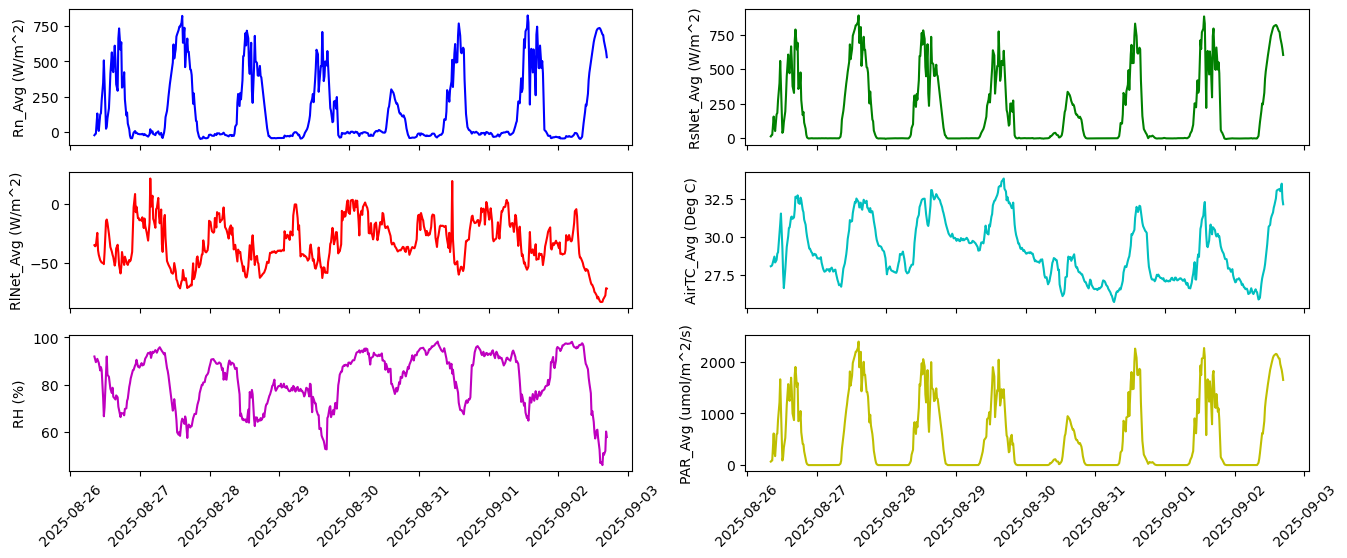

In [62]:
vars = ['Rn_Avg', 'RsNet_Avg', 'RlNet_Avg', 'AirTC_Avg', 'RH', 'PAR_Avg']
colors = ['b', 'g', 'r', 'c', 'm', 'y']
fig, ax = plt.subplots(3, 2, figsize=(16, 6), sharex=True)
for k, v in enumerate(vars):
    u = units[varname.index(v)]
    m = k // 2
    n = k % 2
    ax[m,n].plot(df['TIMESTAMP'], df[v], color=colors[k])
    ax[m,n].set_ylabel(f'{v} ({u})')
    # ax[m,n].legend()

# Set major ticks every 4 hours
# ax[-1,0].xaxis.set_major_locator(mdates.HourLocator(byhour=[0, 6, 12, 18]))
# ax[-1,0].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.setp(ax[-1,0].xaxis.get_majorticklabels(), rotation=45)
plt.setp(ax[-1,1].xaxis.get_majorticklabels(), rotation=45)


In [4]:
def load_data(fname):
    bin_data, meta = cs.read_cs_files(fname)
    df = pd.DataFrame(columns = meta[2], data=None)

    if bin_data != []:
        df['TIMESTAMP'] = pd.to_datetime(bin_data[0])
        for i, col in enumerate(meta[2][1:]):
            df[col] = bin_data[i + 1]
    return df, meta

In [49]:
from natsort import natsorted

var = 'ts_data'
src_dir = '/Users/pvn/Downloads/Download-2025-08-25'

full_filenames = natsorted(glob.glob(os.path.join(src_dir, f'{var}*.dat')))    
df1, meta1 = load_data(full_filenames[12])
df25, meta25 = load_data(full_filenames[64])

In [52]:
# CO2: umol/mol -> mmol/m3
# Actual unit should be mg/m3, but the label is wrong (umol/mol). We devide by 44 to convert to mmol/m3
# df1["CO2"] = df1["CO2"]/44

# H2O: actual unit is g/m3, 
df1
# plt.plot(df1["H2O"]/0.018)
# plt.plot(df25["H2O"])

,TIMESTAMP,RECORD,Ux,Uy,Uz,SonicTemp,SonicDiag,CO2,H2O,irga(3),irga_diag,CH4D,Pressure,Temp,Diag77,RSSI
0,2025-07-12 00:00:00.100,9057450,2.212814,5.040818,0.916643,31.368927,0.0,750.513672,21.723402,101.594238,255.0,0.075147,101.613998,28.078779,79.0,20.285755
1,2025-07-12 00:00:00.200,9057451,2.146849,5.119798,0.500101,31.330261,0.0,751.894409,21.873392,101.594238,255.0,0.075093,101.614975,28.081354,79.0,21.971594
2,2025-07-12 00:00:00.300,9057452,2.043077,5.012269,0.239173,31.297119,0.0,750.845093,21.757835,101.598938,255.0,0.075272,101.614014,28.085627,79.0,21.912880
3,2025-07-12 00:00:00.400,9057453,2.466233,5.285542,0.143889,31.300446,0.0,751.542236,21.827787,101.598938,255.0,0.075399,101.614975,28.087271,79.0,21.969612
4,2025-07-12 00:00:00.500,9057454,2.496326,5.524487,0.147373,31.341064,0.0,752.100586,21.865444,101.598938,255.0,0.075359,101.614014,28.084249,79.0,22.015438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
863995,2025-07-12 23:59:59.600,9921445,1.604113,2.712506,0.453287,30.923889,0.0,755.686401,23.489573,101.622429,255.0,0.075538,101.634659,27.746302,527.0,26.590752
863996,2025-07-12 23:59:59.700,9921446,1.563856,2.786520,0.307661,30.971619,0.0,757.088135,23.647598,101.627121,255.0,0.075542,101.634705,27.747316,527.0,26.443516
863997,2025-07-12 23:59:59.800,9921447,1.728234,2.660205,0.395910,30.960846,0.0,756.916504,23.627790,101.622429,255.0,0.075478,101.635300,27.751408,527.0,26.626522
863998,2025-07-12 23:59:59.900,9921448,1.464965,2.807177,0.178085,31.098663,0.0,756.123169,23.530016,101.627121,255.0,0.075548,101.634003,27.754559,527.0,26.837091


In [51]:
# CO2 -- Actual is mmol/m3, we need to change umol/m3 to mmol/m3
# H2O -- Actual is mmol/m3, we need to change mmol/m3 to mmol/m3
df25

,TIMESTAMP,RECORD,Ux,Uy,Uz,SonicTemp,SonicDiag,CO2,H2O,irga(3),irga_diag,CH4D,Pressure,Temp,Diag77,RSSI
0,2025-08-25 19:00:00.100,123841,1.653584,2.673899,0.033252,33.412811,0.0,16.547947,945.993713,101.373428,255.0,0.076489,101.417229,31.662868,16399.0,1.089142
1,2025-08-25 19:00:00.200,123842,1.601209,2.661757,0.050553,33.424164,0.0,16.545118,948.953918,101.373428,255.0,0.076369,101.416763,31.651594,16399.0,1.085660
2,2025-08-25 19:00:00.300,123843,1.546071,2.657461,0.018048,33.431152,0.0,16.549225,947.579712,101.373428,255.0,0.076046,101.416618,31.644402,16399.0,1.086167
3,2025-08-25 19:00:00.400,123844,1.628566,2.632991,0.084770,33.418396,0.0,16.549278,953.145508,101.373428,255.0,0.076177,101.417618,31.639210,16399.0,1.088228
4,2025-08-25 19:00:00.500,123845,1.608828,2.652106,0.003630,33.426941,0.0,16.546684,953.082764,101.378120,255.0,0.076080,101.417381,31.642464,16399.0,1.088398
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2983,2025-08-25 19:04:58.400,126824,1.243814,1.963740,0.141201,34.122284,0.0,16.383846,1060.942993,101.382820,255.0,0.075835,101.416992,31.871922,16463.0,0.947528
2984,2025-08-25 19:04:58.500,126825,1.291025,1.987291,0.052019,34.132538,0.0,16.366535,1069.529785,101.382820,255.0,0.076079,101.417511,31.872805,16463.0,0.944739
2985,2025-08-25 19:04:58.600,126826,1.252975,2.067722,0.003006,34.099274,0.0,16.357868,1079.141235,101.382820,255.0,0.075703,101.418518,31.876661,16463.0,0.940404
2986,2025-08-25 19:04:58.700,126827,1.168267,2.048584,-0.041042,34.035522,0.0,16.361595,1078.468872,101.392212,255.0,0.074968,101.418999,31.878452,16463.0,0.939914


In [38]:
df1["H2O"].mean()/df25["H2O"].mean()

0.02294569781848473